In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Data_collisions.csv')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

(array([136485.,  58188.]),
 array([1. , 1.5, 2. ]),
 <a list of 2 Patch objects>)

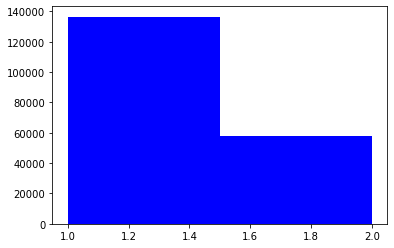

In [5]:
# sns.barplot(x="SEVERITYCODE",  data=df)
plt.hist(df['SEVERITYCODE'], bins =2, facecolor='blue')

In [6]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


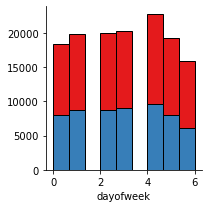

In [7]:
df['dayofweek'] = df['INCDATE'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, hue="SEVERITYCODE", palette="Set1")
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
# g.axes[-1].legend()
plt.show()

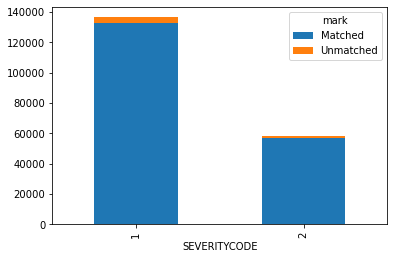

In [8]:
ct = pd.crosstab(df.SEVERITYCODE, df.STATUS)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

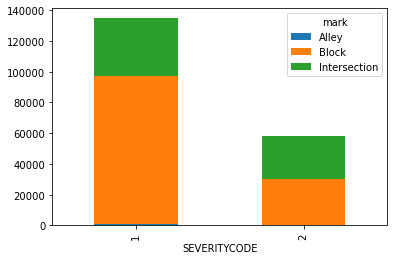

In [9]:
ct = pd.crosstab(df.SEVERITYCODE, df.ADDRTYPE)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

SEVERITYDESC   Injury Collision  Property Damage Only Collision
EXCEPTRSNCODE                                                  
                          26533                           52640
NEI                         515                            5123


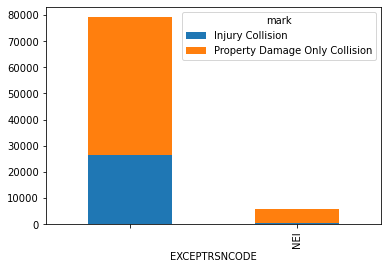

In [10]:
df['EXCEPTRSNCODE'].value_counts()
ct = pd.crosstab(df.EXCEPTRSNCODE, df.SEVERITYDESC)
print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [11]:
df['EXCEPTRSNDESC'].value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYDESC  Injury Collision  Property Damage Only Collision
SEVERITYCODE                                                  
1                            0                          136485
2                        58188                               0


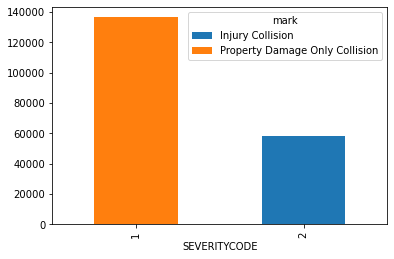

In [12]:
df['SEVERITYDESC'].value_counts()
ct = pd.crosstab(df.SEVERITYCODE, df.SEVERITYDESC)
print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

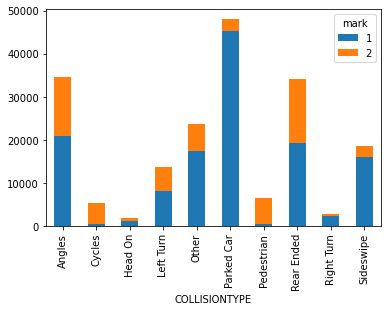

In [13]:
df['COLLISIONTYPE'].value_counts()

ct = pd.crosstab(df.COLLISIONTYPE, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

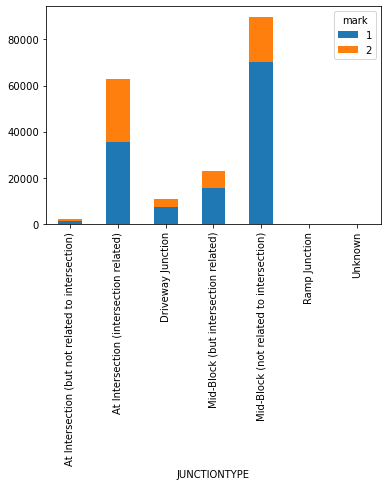

In [14]:
df['JUNCTIONTYPE'].value_counts()

ct = pd.crosstab(df.JUNCTIONTYPE, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

In [15]:
df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
54        1
43        1
87        1
85        1
49        1
Name: ST_COLCODE, Length: 115, dtype: int64

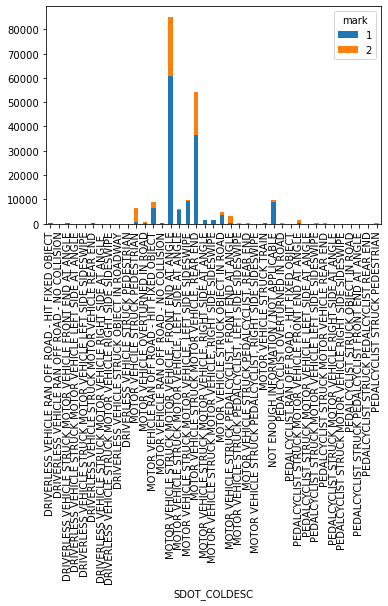

In [16]:
df['SDOT_COLDESC'].value_counts()

ct = pd.crosstab(df.SDOT_COLDESC, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

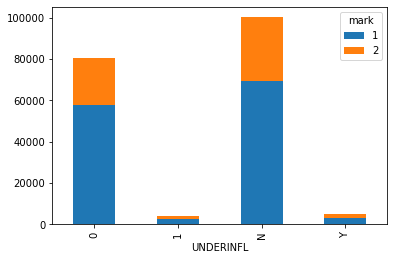

In [17]:
df['UNDERINFL'].value_counts()

ct = pd.crosstab(df.UNDERINFL, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

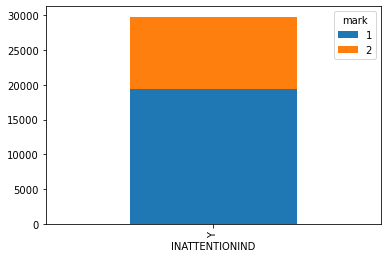

In [18]:
df['INATTENTIONIND'].value_counts()

ct = pd.crosstab(df.INATTENTIONIND, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

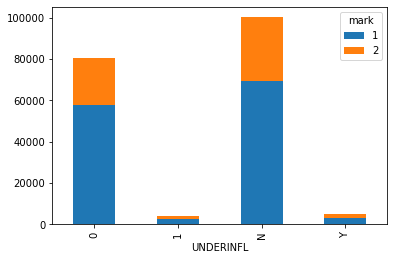

In [19]:
df['UNDERINFL'].value_counts()

ct = pd.crosstab(df.UNDERINFL, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

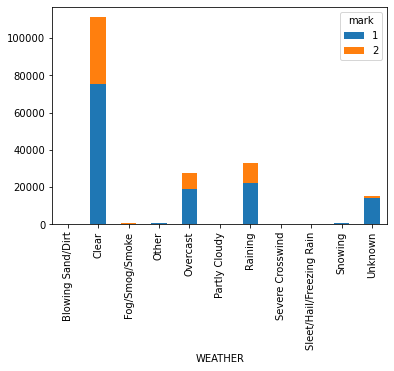

In [20]:
df['WEATHER'].value_counts()

ct = pd.crosstab(df.WEATHER, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

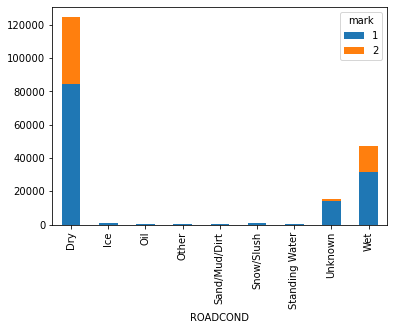

In [21]:
df['ROADCOND'].value_counts()

ct = pd.crosstab(df.ROADCOND, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

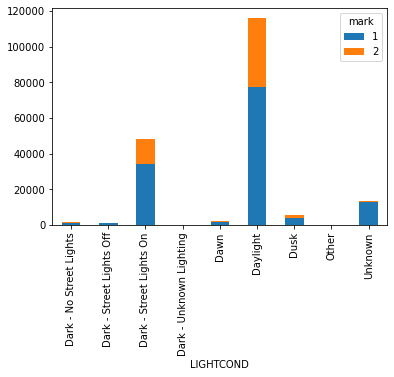

In [22]:
df['LIGHTCOND'].value_counts()

ct = pd.crosstab(df.LIGHTCOND, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

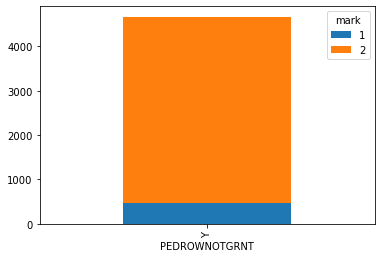

In [23]:
df['PEDROWNOTGRNT'].value_counts()

ct = pd.crosstab(df.PEDROWNOTGRNT, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

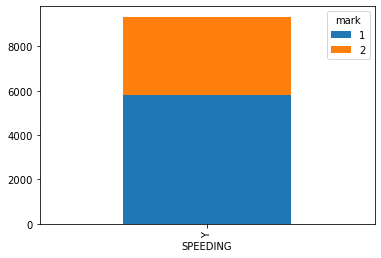

In [24]:
df['SPEEDING'].value_counts()

ct = pd.crosstab(df.SPEEDING, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

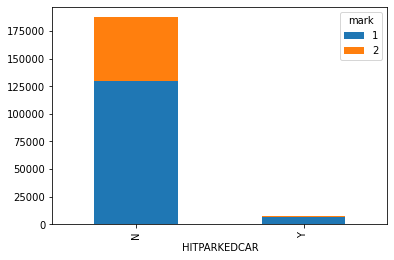

In [25]:
df['HITPARKEDCAR'].value_counts()

ct = pd.crosstab(df.HITPARKEDCAR, df.SEVERITYCODE)
# print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

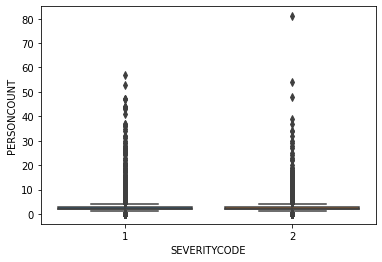

In [26]:
sns.boxplot(x="SEVERITYCODE", y="PERSONCOUNT", data=df)

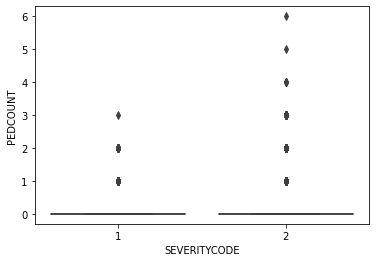

In [27]:
sns.boxplot(x="SEVERITYCODE", y="PEDCOUNT", data=df)

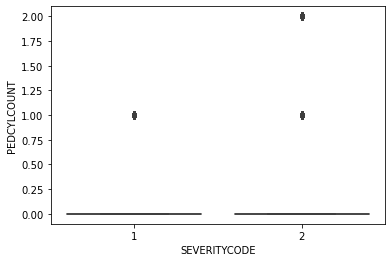

In [28]:
sns.boxplot(x="SEVERITYCODE", y="PEDCYLCOUNT", data=df)

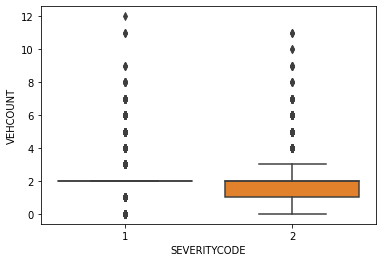

In [29]:
sns.boxplot(x="SEVERITYCODE", y="VEHCOUNT", data=df)

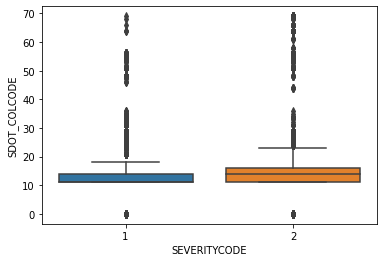

In [30]:
sns.boxplot(x="SEVERITYCODE", y="SDOT_COLCODE", data=df)

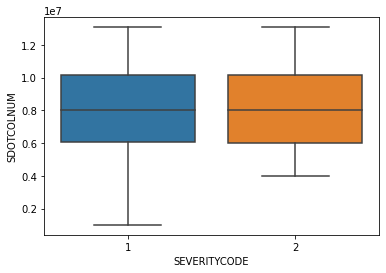

In [31]:
sns.boxplot(x="SEVERITYCODE", y="SDOTCOLNUM", data=df)

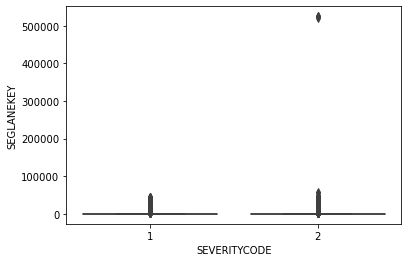

In [32]:
sns.boxplot(x="SEVERITYCODE", y="SEGLANEKEY", data=df)

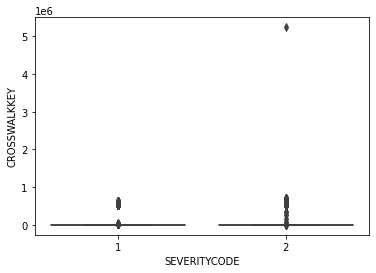

In [33]:
sns.boxplot(x="SEVERITYCODE", y="CROSSWALKKEY", data=df)

In [11]:
df.describe(include='all')
# dis_stat.to_csv('discriptive_stats.csv')
# print(dis_stat)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673,194673.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,1,NaN,1,115,62,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN,2.938728
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN,1.921549
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,1.000000


In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
SEVERITYCODE,SEVERITYCODE,0.000000
X,X,2.739979
Y,Y,2.739979
OBJECTID,OBJECTID,0.000000
INCKEY,INCKEY,0.000000
COLDETKEY,COLDETKEY,0.000000
REPORTNO,REPORTNO,0.000000
STATUS,STATUS,0.000000
ADDRTYPE,ADDRTYPE,0.989351
INTKEY,INTKEY,66.574718


In [13]:
df['JUNCTIONTYPE'].value_counts()
# ct = pd.crosstab(df.LIGHTCOND, df.SEVERITYCODE)
# print(ct)

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [14]:
df = df.replace({'LIGHTCOND' : { 'Unknown' : 'Other', 'Dusk' : 'Other', 'Dawn' : 'Other' , 'Dark - No Street Lights' : 'Other','Dark - Street Lights Off' : 'Other', 'Other' : 'Other', 'Dark - Unknown Lighting' : 'Other' }})
df = df.replace({'ROADCOND' : { 'Unknown' : 'Other', 'Ice' : 'Other', 'Snow/Slush' : 'Other' , 'Other' : 'Other','Standing Water' : 'Other', 'Sand/Mud/Dirt' : 'Other', 'Oil' : 'Other' }})
df = df.replace({'WEATHER' : { 'Unknown' : 'Other', 'Snowing' : 'Other', 'Fog/Smog/Smoke' : 'Other' , 'Other' : 'Other','Sleet/Hail/Freezing Rain' : 'Other', 'Blowing Sand/Dirt' : 'Other', 'Severe Crosswind' : 'Other','Partly Cloudy' : 'Other' }})
# df = df.replace({'UNDERINFL' : { 'N' : 0, 'Y' : 1,'0' : 0, '1' : 1}})
df = df.replace({'JUNCTIONTYPE' : { 'Unknown' : 'Other', 'At Intersection (but not related to intersection)' : 'Other', 'Ramp Junction' : 'Other'  }})


In [15]:
Feature = df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','SEGLANEKEY','CROSSWALKKEY','STATUS','ADDRTYPE','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
Feature.shape

(194673, 18)

In [16]:
Feature_1 = pd.get_dummies(Feature)
Feature_1.shape

(194673, 36)

In [17]:
Feature_1.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,...,ROADCOND_Dry,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Daylight,LIGHTCOND_Other,PEDROWNOTGRNT_Y,SPEEDING_Y,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,0,0,2,11,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,0,0,2,16,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,4,0,0,3,14,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,3,0,0,3,11,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2,0,0,2,11,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [18]:
X = Feature_1
X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,...,ROADCOND_Dry,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Daylight,LIGHTCOND_Other,PEDROWNOTGRNT_Y,SPEEDING_Y,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,0,0,2,11,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,0,0,2,16,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
2,4,0,0,3,14,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,3,0,0,3,11,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2,0,0,2,11,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [19]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.41751024,
        -0.08124849, -0.13536153,  0.16046824, -0.16046824, -0.06223095,
        -1.36876932,  1.41129279,  1.44892892, -0.2408193 , -0.36412936,
        -0.92535062, -0.1086919 , -0.42518348, -0.83874241, -0.14474651,
         0.97026313, -0.16444885, -1.15340914, -0.3152485 ,  2.45445634,
        -0.45298634, -1.33213439, -0.31602581,  1.76085874, -0.576075  ,
         0.82233559, -0.38260891, -0.1567239 , -0.22440165,  0.19619929,
        -0.19619929],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783,  0.31042563,
        -0.08124849, -0.13536153,  0.16046824, -0.16046824, -0.06223095,
         0.73058329, -0.70857019, -0.69016498, -0.2408193 , -0.36412936,
         1.08067145, -0.1086919 , -0.42518348,  1.19226116, -0.14474651,
        -1.03064826, -0.16444885, -1.15340914, -0.3152485 , -0.4074222 ,
         2.2075721 , -1.33213439, -0.31602581,  1.76085874,  1.73588509,
        -1.21604855, -0.38260

In [21]:
# Evaluation Metrices
from sklearn.metrics import  f1_score, log_loss

In [22]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [23]:
# Important features

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [24]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(Feature_1.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
# fi.to_csv('feature_imp.csv')
# Display
fi.head()

,feature,importance
4,SDOT_COLCODE,0.172499
0,PERSONCOUNT,0.163925
1,PEDCOUNT,0.092571
3,VEHCOUNT,0.070084
2,PEDCYLCOUNT,0.068789


In [25]:
Feature_2=Feature_1[['SDOT_COLCODE','PERSONCOUNT','PEDCOUNT','VEHCOUNT','PEDCYLCOUNT','CROSSWALKKEY','INATTENTIONIND_Y','ADDRTYPE_Intersection','JUNCTIONTYPE_At Intersection (intersection related)','PEDROWNOTGRNT_Y','SEGLANEKEY','SPEEDING_Y','WEATHER_Other','JUNCTIONTYPE_Mid-Block (not related to intersection)','ADDRTYPE_Block','ROADCOND_Other','LIGHTCOND_Daylight','UNDERINFL_N','UNDERINFL_0','WEATHER_Overcast']]

In [26]:
X = Feature_2
X.shape

(194673, 20)

In [27]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.41751024, -0.33020207, -0.18743029,  0.12553783, -0.16958841,
        -0.13536153, -0.42518348,  1.41129279,  1.44892892, -0.1567239 ,
        -0.08124849, -0.22440165, -0.3152485 , -0.92535062, -1.36876932,
        -0.31602581,  0.82233559,  0.97026313, -0.83874241,  2.45445634],
       [ 0.31042563, -0.33020207, -0.18743029,  0.12553783, -0.16958841,
        -0.13536153, -0.42518348, -0.70857019, -0.69016498, -0.1567239 ,
        -0.08124849, -0.22440165, -0.3152485 ,  1.08067145,  0.73058329,
        -0.31602581, -1.21604855, -1.03064826,  1.19226116, -0.4074222 ],
       [ 0.01925128,  1.15576451, -0.18743029,  1.7102107 , -0.16958841,
        -0.13536153, -0.42518348, -0.70857019, -0.69016498, -0.1567239 ,
        -0.08124849, -0.22440165, -0.3152485 ,  1.08067145,  0.73058329,
        -0.31602581,  0.82233559, -1.03064826,  1.19226116,  2.45445634],
       [-0.41751024,  0.41278122, -0.18743029,  1.7102107 , -0.16958841,
        -0.13536153, -0.42518348, -0.70857019, -

In [28]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [48]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

# Final Optimal model
ks = range(4, 5, 1)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))
    print(f1_score(y_test, knn_yhat, average = 'weighted'))

0.7010331507452929


In [58]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.737922177988956 


In [30]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [31]:
depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
#     jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [32]:
# Creating a df to check the best value of max_depth

result = pd.DataFrame([f1_score_], index = ['F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
F1,0.642846,0.684339,0.684339,0.684351,0.699009,0.697114,0.702509,0.702374,0.703509


In [33]:
# Main Model

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(max_depth=7)

In [63]:
#  Libraries

from sklearn.svm import SVC 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
svc_yhat = svc_model.predict(X_test)
accuracy_score(y_test, svc_yhat)


In [ ]:
kernel_func = ['sigmoid']
#                'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

In [ ]:
accuracy_score

In [34]:
# Libraries

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
solvers = ['lbfgs']
# , 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1]
# , 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
        print(f1_score(y_test, lr_yhat, average = 'weighted'))
#         print(roc_auc_score(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.5176586904627092
0.700394214969139




In [47]:
# Important features

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

print(f1_score(y_test, rf_predictions, average = 'weighted'))

0.7102802620366726


In [37]:
roc_value

0.7638818947961095

In [49]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.